In [133]:
%matplotlib inline
from matplotlib.pylab import *
import numpy as np

import matplotlib as mpl
mpl.rcParams['lines.linewidth'] = 2
mpl.rcParams['lines.color'] = 'r'
mpl.rcParams['font.size'] = 13

We use the following intensity model:

$$ i(t) = \alpha + \sum\limits_{i=0}^{N(t)} \gamma\cdot \exp{\left(-(t-t_e^i)\cdot \beta\right)}$$

where $t_e^i$ is the time that event $i$ occurred, $N(t)$ is the number of events that occurred until time $t$,  $\alpha$ is the base intensity, $\beta$ is the intensity decay rate and $\gamma$ is the event intensity amplitude.

In [135]:
def get_intensity(t, events, alpha, beta, gamma):
    return alpha + sum([gamma*np.exp(-(t-e)*beta) for e in events])

We simulate a Hawkes process by calculating the intensity in each time step and checking if it exceeds a random treshold value (distributed uniformly between 0 and 0.5). If it does, we create a new event. By choosing the probability threshold and the intensity parameters $\alpha$, $\beta$ and $\gamma$ we can produce a variety of processes with different degrees of clustering.

In [136]:
import random
def run_process(n, dt, *args, **kwargs):
    events = []
    counts = []
    ts = []
    intensities = []
    i = 0
    t = 0
    count = 0
    while t < n*dt: 
        intensity = get_intensity(t, events, *args, **kwargs)
        if intensity > random.random()*0.5:
            events.append(t)
            count += 1
        intensities.append(intensity)
        counts.append(count)
        ts.append(t)
        t += dt
    return ts, intensities, events, counts

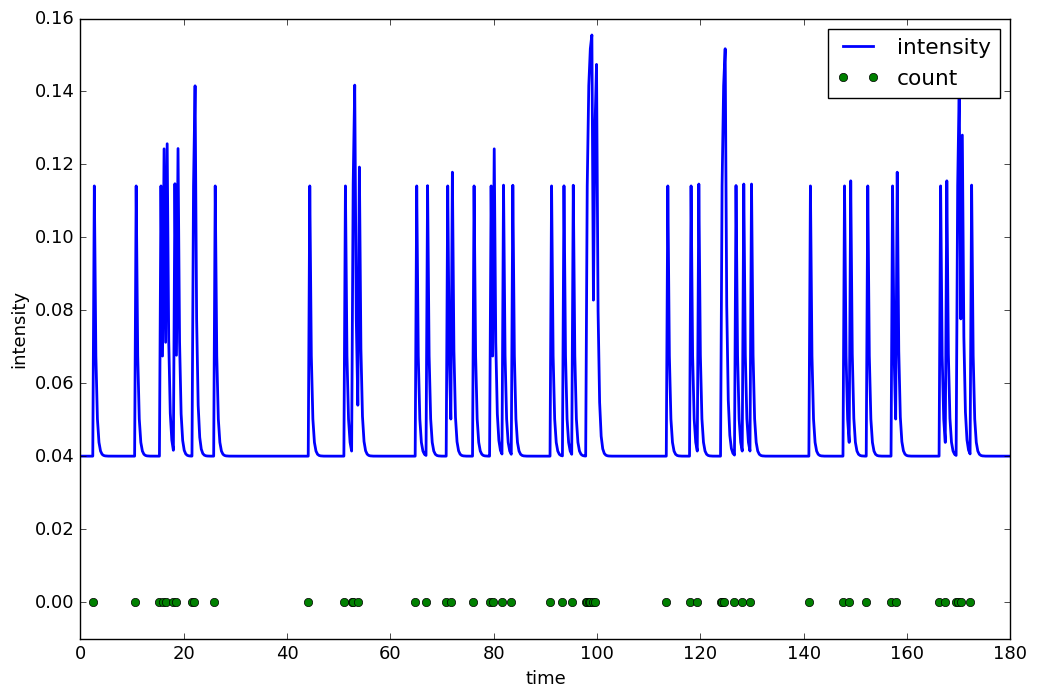

In [138]:
ts, intensities, events, counts = run_process(600, 0.3, alpha=0.04, beta=3.31, gamma=0.2)
figure(figsize=(12,8))
plot(ts, intensities)
plot(events,[0 for i in range(len(events))], ls = '', marker='o')
ylim(bottom=-0.01)
legend(["intensity", "count"])
xlabel("time")
ylabel("intensity")